# Modeling Viral Marketing
#####  March 20, 2020
##### Team members:  

Alessandro Pisano,
Caterina Fabbri,
Chiara Di Bonaventura,
Filippo Burresi


In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact, interactive
import ipywidgets as widgets

## ***Viral Marketing: SEIR Model***
----

Individuals belong to one of those categories:

1. Target Market ($S$)
2. Exposed to the Message ($E$)
3. Actively Passing the Message ($I$) 
4. Done Passing the Message ($R$) 

The system of differential equations of the model is :

\begin{eqnarray}
\frac{\partial S_t}{\partial t} = -\lambda S_t\\
\frac{\partial E_t}{\partial t} = \lambda S_t - \alpha E_t - h E_t\\
\frac{\partial I_t}{\partial t} = \alpha E_t - \gamma I_t\\
\frac{\partial R_t}{\partial t} =  h E_t + \gamma I_t\\
\end{eqnarray}


**Parameters:**

1.  $\lambda$ is the ***force of infection***:   $\lambda =  \beta  \frac{I}{ N} $
    *  $\frac{I}{ N}$ : ***probability*** of getting in contact with an actively passing (I)  
    * $\beta$ is the ***likelihood of moving from susceptible to exposed.*** 
2.  $\alpha$ is the ***probability*** of an exposed consumer becoming an active sharer of the message. 

3. $\gamma$ is the ***transition rate***  from infective to recovered, i.e. when a individual who is actively passing the message stop sharing it.

4. ***h*** is the ***transition rate*** from exposed to recovered, i.e. when an indidual exposed to the message decide to not share it.

\
**Basic Reproductive Number** ($R0$)
\
Is the average number of secondary infectious cases resulting from an infectious case in a totally susceptible population.\
In this case it is the average number of secondary active sharer of the message from a spread
of the message in a Target Market: $ \frac{\beta}{\gamma}$




In [2]:
class Viral_model:
    def __init__(self, 
                 INPUT, 
                 beta:float, 
                 alpha:float, 
                 gamma:float,
                 h:float, 
                 nt:int, 
                 steps_per_t:int):
        
        """
        :params:
        INPUT: S , E, I , R  initial population in each state
        beta: likelihood of moving from susceptible to exposed.
        alpha: probability of an exposed consumer becoming an active sharer of the message.
        gamma: transition rate from infective to recovered.
        h: transition rate from exposed to recovered
        nt: number of time steps (day /month /year) you want to run the simulation
        steps_per_t: number of step per each time unit
        """
        
        # INITIALIZE POPULATION
        self.INPUT = INPUT

        # INITIALIZE PARAMETERS
        self.beta = beta 
        self.alpha = alpha
        self.gamma = gamma
        self.h = h

        # DEFINE TIME VARIABLE 
        self.time_step = 1/ steps_per_t   
        self.t = np.arange(0, nt+1, self.time_step) 
        
    def SIR_eq(self, INPUT, t, beta, alpha, gamma, h):
    
        """
        :returns:
        variations of the sistem dS, dE, dI, dR 
        """
        S, E, I, R = INPUT  
        N = S + E + I + R
        
        dS_dt = - (beta * S * I/N) 
        dE_dt = (beta * S * I/N) - (alpha * E) - (h * E)
        dI_dt = (alpha * E) - (gamma * I)
        dR_dt = (h * E) + (gamma * I)
        
        return dS_dt, dE_dt, dI_dt, dR_dt
    
    def run(self):  
        """
        :returns:
        List of population over time. 
        Each element of the list represent the population size at a given time step. 
        """ 
        
        RES = odeint(self.SIR_eq, self.INPUT, self.t, args=(self.beta,
                                                            self.alpha,
                                                            self.gamma,
                                                            self.h))
        
        self.SRES, self.ERES, self.IRES, self.RRES  = RES.T
        return self.SRES, self.ERES, self.IRES, self.RRES

### ***First simulation***

In [3]:
# Define time variables: 
nt = 80
steps_per_t = 1

#Initialize Parameters
alpha = 0.5
beta = 0.9
gamma = 0.1
h = 0.15

#Initialize Population
N0 = 100
E0 = 0
I0 = 1
S0 = 99
R0 = N0 - I0 - E0 - S0

#Initialize population vector
INPUT = S0, E0, I0, R0

In [4]:
#Run the model
Viral_S1 = Viral_model(INPUT, beta, alpha, gamma, h, nt, steps_per_t)
S, E, I, R = Viral_S1.run()

print('Basic reproductive number (Ro): {}'.format((round(beta/gamma,3)))) 
print('\nPopulation in {} days:'.format(int(nt)))
print('Target Market (naive): {}'.format(round(S[-1], 3)))
print('Exposed: {}'.format(round(E[-1], 3)))
print('Actively Passing: {}'.format(round(I[-1], 3)))
print('Done Passing: {}'.format(round(R[-1], 3)))

Basic reproductive number (Ro): 9.0

Population in 80 days:
Target Market (naive): 0.097
Exposed: 0.0
Actively Passing: 0.109
Done Passing: 99.794


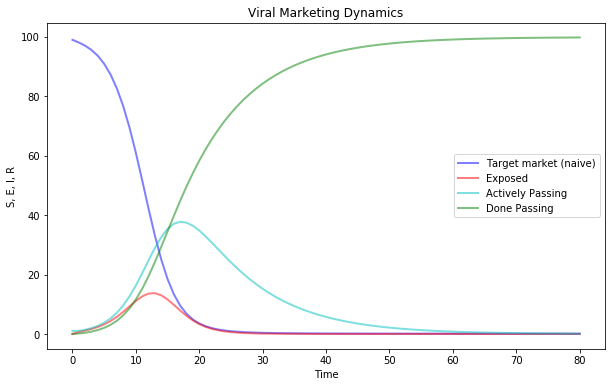

In [5]:
# PLOT
fig, ax = plt.subplots(nrows=1, ncols=1, facecolor='w', figsize=(10,6))
ax.set_title('Viral Marketing Dynamics')

ax.plot(Viral_S1.t, S, 'b', alpha=0.5, lw=2, label= 'Target market (naive)')
ax.plot(Viral_S1.t, E, 'r', alpha=0.5, lw=2, label= 'Exposed')
ax.plot(Viral_S1.t, I, 'c', alpha=0.5, lw=2, label= 'Actively Passing')
ax.plot(Viral_S1.t, R, 'g', alpha=0.5, lw=2, label= 'Done Passing')

ax.set_xlabel('Time')
ax.set_ylabel('S, E, I, R')
legend = ax.legend()

### ***Sensitivity analysis: parameter effect, changes in $\beta$, $\alpha$, $\gamma$, $h$***

In [6]:
def plot_solution(beta, alpha, gamma, h, nt, steps_per_t):
    r = Viral_model(INPUT, beta , alpha,
                gamma, h, nt, steps_per_t)
    
    S, E, I, R = r.run()
    
    fig, ax = plt.subplots(nrows=1, ncols=1, facecolor='w', figsize=(10,6))
    ax.set_title('Viral Marketing Dynamics')

    ax.plot(r.t, S, 'b', alpha=0.5, lw=2, label= 'Target market (naive)')
    ax.plot(r.t, E, 'r', alpha=0.5, lw=2, label= 'Exposed')
    ax.plot(r.t, I, 'c', alpha=0.5, lw=2, label= 'Actively Passing')
    ax.plot(r.t, R, 'g', alpha=0.5, lw=2, label= 'Done Passing')

    ax.set_xlabel('Time')
    ax.set_ylabel('S, E, I, R')
    legend = ax.legend()

w = interactive(plot_solution, 
                beta = widgets.FloatSlider(value=0.9, min=0, max=2,step=0.1), 
                alpha= widgets.FloatSlider(value=0.5, min=0, max=2,step=0.1),
                gamma= widgets.FloatSlider(value=0.1, min=0, max=2,step=0.1),
                h= widgets.FloatSlider(value=0.15, min=0, max=2,step=0.1),
                nt=80,
                steps_per_t=1)
display(w)

interactive(children=(FloatSlider(value=0.9, description='beta', max=2.0), FloatSlider(value=0.5, description=…

### ***Sensitivity analysis: changes in the initial infected population***
We analyse the changes in the inital population, holding the parameters fixed.

In [7]:
# Define time variables: 
nt = 80
steps_per_t = 1

#Initialize Parameters
alpha = 0.5
beta = 0.9
gamma = 0.1
h = 0.15

#Initialize Population
N0 = 150
E0 = 0
I0 = [1, 5, 10, 20]
R0 = 0

#Run the model
Spop = []
Epop = []
Ipop = []
Rpop = []

for p in I0:
    
    S0 = N0 - p - E0 - R0

    #Initialize population vector
    INPUT = S0, E0, p, R0

    print(f"Model with inital number of infected equal to {p}" )
    Viral_S1P = Viral_model(INPUT, beta, alpha, gamma, h, nt, steps_per_t)
    S, E, I, R = Viral_S1P.run()
    print('\nBasic reproductive number (Ro): {}'.format((round(beta/gamma,3)))) 
    print('Population in {} days:'.format(int(nt)))
    print('Target Market (naive): {}'.format(round(S[-1], 3)))
    print('Exposed: {}'.format(round(E[-1], 3)))
    print('Actively Passing: {}'.format(round(I[-1], 3)))
    print('Done Passing: {}'.format(round(R[-1], 3)))
    Spop.append(S)
    Epop.append(E)
    Ipop.append(I)
    Rpop.append(R)
    print("\n")

Model with inital number of infected equal to 1

Basic reproductive number (Ro): 9.0
Population in 80 days:
Target Market (naive): 0.147
Exposed: 0.0
Actively Passing: 0.184
Done Passing: 149.668


Model with inital number of infected equal to 5

Basic reproductive number (Ro): 9.0
Population in 80 days:
Target Market (naive): 0.135
Exposed: 0.0
Actively Passing: 0.116
Done Passing: 149.749


Model with inital number of infected equal to 10

Basic reproductive number (Ro): 9.0
Population in 80 days:
Target Market (naive): 0.121
Exposed: 0.0
Actively Passing: 0.094
Done Passing: 149.784


Model with inital number of infected equal to 20

Basic reproductive number (Ro): 9.0
Population in 80 days:
Target Market (naive): 0.098
Exposed: 0.0
Actively Passing: 0.077
Done Passing: 149.825




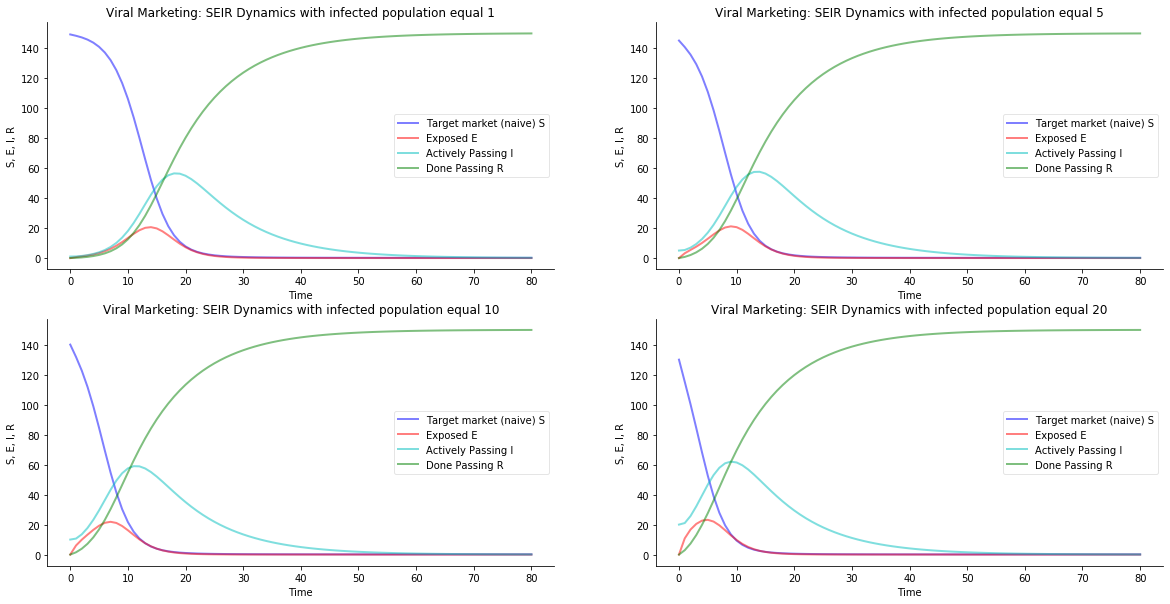

In [8]:
# PLOT
fig, axs = plt.subplots(nrows=2, ncols=2, facecolor='w', figsize=(20,10))

for i in range(4):
    ax = axs.flatten()
    ax = ax[i]
    ax.set_title(f'Viral Marketing: SEIR Dynamics with infected population equal {I0[i]}')

    ax.plot(Viral_S1P.t, Spop[i], 'b', alpha=0.5, lw=2, label= 'Target market (naive) S')
    ax.plot(Viral_S1P.t, Epop[i], 'r', alpha=0.5, lw=2, label= 'Exposed E')
    ax.plot(Viral_S1P.t, Ipop[i], 'c', alpha=0.5, lw=2, label= 'Actively Passing I')
    ax.plot(Viral_S1P.t, Rpop[i], 'g', alpha=0.5, lw=2, label= 'Done Passing R')

    ax.set_xlabel('Time')
    ax.set_ylabel('S, E, I, R')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right'): 
        ax.spines[spine].set_visible(False)

## ***Viral Marketing: SEIR Model with two Risk Groups***

We decide to extend the previous model towards an analysis that captures better the different power that individuals have to reach views. Indeed, we add a risk structure with two categories of individual : high (influencer) and low risk (follower). The former, that we define as an influencer, since are followed by million of users, have a great power in sharing a marketing campaign, and thus infect other susceptibles. The influencer, instead, does not have a great risk to come into contact with posts, videos or messages shared online by follower, whereas the likelihood to see a marketing campaign through another influencer is high. For instance, Elon Mask has a greater transmission power and at the same time is possible that he can be 'infected' by Jeff Bezos and we (follower) are likely to be exposed to their social content, but they are absolutely not likely to see our posts. 

----

Individuals can be High Risk (H) or Low Risk (L), so now we can classify them into:

1. Target Market ($S_H$) and ($S_L$)
2. Exposed to the Message ($E_H$) and ($E_L$)
3. Actively Passing the Message ($I_H$) and ($I_L$) 
4. Done Passing the Message ($R_H$) and ($R_L$) 


***Note:***
There is no transition movement between the two groups.


System of differential equations :

\begin{eqnarray}
\frac{\partial S_{Ht}}{\partial t} = -(\lambda_{HH} S_{Ht} + \lambda_{HL} S_{Ht})\\
\frac{\partial S_{Lt}}{\partial t} = -(\lambda_{LH} S_{Lt} + \lambda_{LL} S_{Lt})\\
\frac{\partial E_{Ht}}{\partial t} = (\lambda_{HH} S_{Ht} + \lambda_{HL} S_{Ht}) - \alpha E_{Ht} - h E_{Ht}\\
\frac{\partial E_{Lt}}{\partial t} = (\lambda_{LH} S_{Lt} + \lambda_{LL} S_{Lt}) - \alpha  E_{Lt} - h E_{Lt}\\
\frac{\partial I_{Ht}}{\partial t} = \alpha E_{Ht} - \gamma I_{Ht}\\
\frac{\partial I_{Lt}}{\partial t} = \alpha E_{Lt} - \gamma I_{Lt}\\
\frac{\partial R_{Ht}}{\partial t} =  h E_{Ht} + \gamma I_{Ht}\\
\frac{\partial R_{Lt}}{\partial t} =  h E_{Lt} + \gamma I_{Lt}\\
\end{eqnarray}


**Parameters:**

1.  a.  $\lambda_{HH}$ is the ***force of infection***:   $\lambda_{HH} =  \beta_{HH}  \frac{I_{Ht}}{ N} $
    *  $\frac{I_{Ht}}{ N}$ : ***probability*** of getting in contact with an actively passing of group H  
    * $\beta_{HH}$ is the ***exposure rate to high risk from high risk***
    
    b.  $\lambda_{HL}$ is the ***force of infection***:   $\lambda_{HL} =  \beta_{HL}  \frac{I_{Lt}}{ N} $
    *  $\frac{I_{Lt}}{ N}$ : ***probability*** of getting in contact with an actively passing (I)  of group L
    * $\beta_{HL}$ is the ***exposure rate to high risk from low risk*** 
    
    c.  $\lambda_{LH}$ is the ***force of infection***:   $\lambda_{LH} =  \beta_{LH}  \frac{I_{Ht}}{ N} $
    *  $\frac{I_{Ht}}{ N}$ : ***probability*** of getting in contact with an actively passing (I) of group H
    * $\beta_{LH}$ is the ***exposure rate to low risk from high risk*** 
    
    d.  $\lambda_{LL}$ is the ***force of infection***:   $\lambda_{LL} =  \beta_{LL}  \frac{I_{Lt}}{ N} $
    *  $\frac{I_{Lt}}{ N}$ : ***probability*** of getting in contact with an actively passing of group L 
    * $\beta_{LL}$ is the ***exposure rate to low risk from low risk***
    
    

2.  $\alpha$ is the ***probability*** of an exposed consumer becoming an active sharer of the message. To not further complicate the model we decide to keep it constant between the L and the H risk.

3. $\gamma$ is the ***transition rate***  from infective to recovered, i.e. when an individual that is actively passing the message stop sharing it. We assume that it is the same among the two groups.

4. ***h*** is the ***transition rate*** from exposed to recovered, i.e. when an indidual exposed to the message decide to not share it. We assume that it is the same among the two groups.

In [9]:
class Viral_rs_model:
    def __init__(self, 
                 INPUT, 
                 BETA, 
                 alpha, 
                 gamma:float,
                 h:float, 
                 nt:int, 
                 steps_per_t:int):
        
        """
        :params:
        INPUT: SH, SL, EH, EL, IH, IL, RH, RL  initial population in each state
        BETA: matrix of likelihood of moving from susceptible to exposed.
        a: probability of an exposed becoming an active sharer of the message.
        gamma: transition rate from infective to recovered.
        h: transition rate from exposed to recovered
        nt: number of time steps (day /month /year) you want to run the simulation
        steps_per_t: number of step per each time unit
        """
        
        # INITIALIZE POPULATION
        self.INPUT = INPUT
        
        # INITIALIZE PARAMETERS
        self.BETA = BETA 
        self.alpha = alpha
        self.gamma = gamma
        self.h = h

        # DEFINE TIME VARIABLE 
        self.time_step = 1/ steps_per_t   
        self.t = np.arange(0, nt+1, self.time_step)  
        
    def SIS_eq(self, INPUT, t, BETA, ALPHA, gamma, h):
        """
        :returns:
        Variations of the sistem 
        """
        SH, SL, EH, EL, IH, IL, RH, RL = INPUT   
        N = SH + SL + EH + EL + IH + IL + RH + RL

        dSH_dt = - (BETA[0] * IH/N + BETA[1] * IL/N) * SH         
        dEH_dt =   (BETA[0] * IH/N + BETA[1] * IL/N) * SH  - alpha * EH - h * EH
        dIH_dt =   alpha * EH - gamma * IH
        dRH_dt =   h * EH + gamma * IH      
                 
        dSL_dt = - (BETA[2] * IH/N + BETA[3] * IL/N) * SL 
        dEL_dt =   (BETA[2] * IH/N + BETA[3] * IL/N) * SL - alpha * EL - h * EL
        dIL_dt =   alpha * EL - gamma * IL
        dRL_dt =   h * EL + gamma * IL
        
        return (dSH_dt, dSL_dt, 
                dEH_dt, dEL_dt, 
                dIH_dt, dIL_dt,
                dRH_dt, dRL_dt)
    
    def run(self):  
        """
        :returns:
        List of population over time. 
        Each element of the list represent the population size at a given time step. 
        """ 
        
        RES = odeint(self.SIS_eq, self.INPUT, self.t, args=(self.BETA,
                                                            self.alpha,
                                                            self.gamma,
                                                            self.h))
                 
        self.SH_RES, self.SL_RES, self.EH_RES, self.EL_RES, self.IH_RES, self.IL_RES, self.RH_RES, self.RL_RES  = RES.T
        
        print('\nPopulation in {} days:'.format(int(self.t[-1])))
        print('Target Market (naive) High Risk: {}'.format(round(self.SH_RES[-1], 3)))
        print('Exposed High Risk: {}'.format(round(self.EH_RES[-1], 3)))
        print('Actively Passing High Risk: {}'.format(round(self.IH_RES[-1], 3)))
        print('Done Passing High Risk: {}'.format(round(self.RH_RES[-1], 3)))
        print('Target Market (naive) Low Risk: {}'.format(round(self.SL_RES[-1], 3)))
        print('Exposed Low Risk: {}'.format(round(self.EL_RES[-1], 3)))
        print('Actively Passing Low Risk: {}'.format(round(self.IL_RES[-1], 3)))
        print('Done Passing Low Risk: {}'.format(round(self.RL_RES[-1], 3)))
        
        return self.SH_RES, self.SL_RES, self.EH_RES, self.EL_RES, self.IH_RES, self.IL_RES, self.RH_RES, self.RL_RES

In [10]:
# Define time variables: 
nt = 80
steps_per_t = 1

#Initialize Parameters
alpha = 0.5
BETA = [2, 0.02, 20, 0.5]   #[B_HH, B_HL, BLH, B_LL]
gamma = 0.1
h = 0.15

#Initialize Population
N = 100 #total target market
EH = 0  
EL = 0
IH = 2
IL = 1
SH = 20
SL = N - IH - IL - SH
RH = 0
RL = 0

#Initialize population vector
INPUT = SH, SL, EH, EL, IH, IL, RH, RL 

In [11]:
#Run the Model
Viral_rs = Viral_rs_model(INPUT, BETA, alpha, gamma, h, nt, steps_per_t)
SH, SL, EH, EL, IH, IL, RH, RL = Viral_rs.run()


Population in 80 days:
Target Market (naive) High Risk: 0.606
Exposed High Risk: 0.001
Actively Passing High Risk: 0.039
Done Passing High Risk: 21.354
Target Market (naive) Low Risk: 0.0
Exposed Low Risk: -0.0
Actively Passing Low Risk: 0.029
Done Passing Low Risk: 77.971


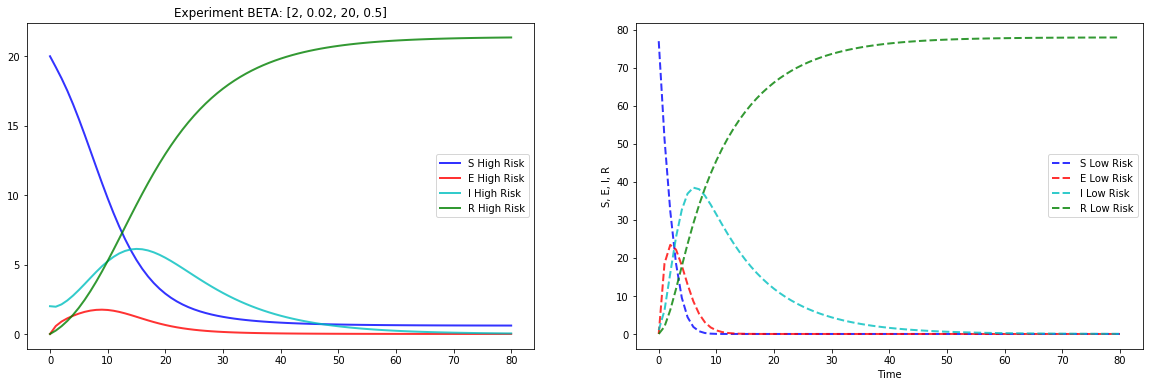

In [12]:
#PLOT
fig, ax = plt.subplots(1,2, sharex=True, facecolor='w', figsize=(20,6))
axs = ax[0]
axs.set_title('Experiment BETA: {}'.format(Viral_rs.BETA))
axs.plot(Viral_rs.t, SH, 'b', alpha=0.8, lw=2, label='S High Risk')
axs.plot(Viral_rs.t, EH, 'r', alpha=0.8, lw=2, label='E High Risk')
axs.plot(Viral_rs.t, IH, 'c', alpha=0.8, lw=2, label='I High Risk')
axs.plot(Viral_rs.t, RH, 'g', alpha=0.8, lw=2, label='R High Risk')
axs.legend(loc='center right')

axs= ax[1]
axs.plot(Viral_rs.t, SL, 'b', alpha=0.8, linestyle='dashed', lw=2, label='S Low Risk')
axs.plot(Viral_rs.t, EL, 'r', alpha=0.8, linestyle='dashed', lw=2, label='E Low Risk')
axs.plot(Viral_rs.t, IL, 'c', alpha=0.8, linestyle='dashed', lw=2, label='I Low Risk')
axs.plot(Viral_rs.t, RL, 'g', alpha=0.8, linestyle='dashed', lw=2, label='R Low Risk')

axs.set_xlabel('Time')
axs.set_ylabel('S, E, I, R')
axs.legend(loc='center right')

fig.savefig('PLOT1')

### ***First simulation: parameter effect, changes in $\beta$***
We analazie the changes in $\beta$, holding the other parameters and the intialial distribution of the population fixed

In [13]:
# Define time variables: 
nt = 80
steps_per_t = 1
#BETA = [2, 0.02, 20, 0.5]
#Initialize Parameters
alpha = 0.5
BETA= [[10, 0.02, 20, 0.5], 
       [2, 0.4, 20, 0.5], 
       [2, 0.02, 8, 0.5], 
       [2, 0.02, 20, 1]] 
gamma = 0.1
h = 0.15

#Initialize Population
N = 100 #total target market
EH = 0  
EL = 0
IH = 2
IL = 1
SH = 20
SL = N - IH - IL - SH
RH = 0
RL = 0

#Initialize population vector
INPUT = SH, SL, EH, EL, IH, IL, RH, RL 

SHbeta = []
EHbeta = []
IHbeta = []
RHbeta = []
SLbeta = []
ELbeta = []
ILbeta = []
RLbeta = []

#Run the Model
for beta in BETA:
    Viral_rsB = Viral_rs_model(INPUT, beta, alpha, gamma, h, nt, steps_per_t)
    SH, SL, EH, EL, IH, IL, RH, RL = Viral_rsB.run()
    SHbeta.append(SH)
    SLbeta.append(SL)
    EHbeta.append(EH)
    ELbeta.append(EL)
    IHbeta.append(IH)
    ILbeta.append(IL)
    RHbeta.append(RH)
    RLbeta.append(RL)


Population in 80 days:
Target Market (naive) High Risk: 0.0
Exposed High Risk: 0.0
Actively Passing High Risk: 0.009
Done Passing High Risk: 21.991
Target Market (naive) Low Risk: 0.0
Exposed Low Risk: -0.0
Actively Passing Low Risk: 0.028
Done Passing Low Risk: 77.972

Population in 80 days:
Target Market (naive) High Risk: 0.056
Exposed High Risk: 0.0
Actively Passing High Risk: 0.013
Done Passing High Risk: 21.93
Target Market (naive) Low Risk: 0.0
Exposed Low Risk: 0.0
Actively Passing Low Risk: 0.029
Done Passing Low Risk: 77.971

Population in 80 days:
Target Market (naive) High Risk: 0.606
Exposed High Risk: 0.001
Actively Passing High Risk: 0.04
Done Passing High Risk: 21.353
Target Market (naive) Low Risk: 0.0
Exposed Low Risk: 0.0
Actively Passing Low Risk: 0.036
Done Passing Low Risk: 77.964

Population in 80 days:
Target Market (naive) High Risk: 0.606
Exposed High Risk: 0.001
Actively Passing High Risk: 0.039
Done Passing High Risk: 21.354
Target Market (naive) Low Risk: 

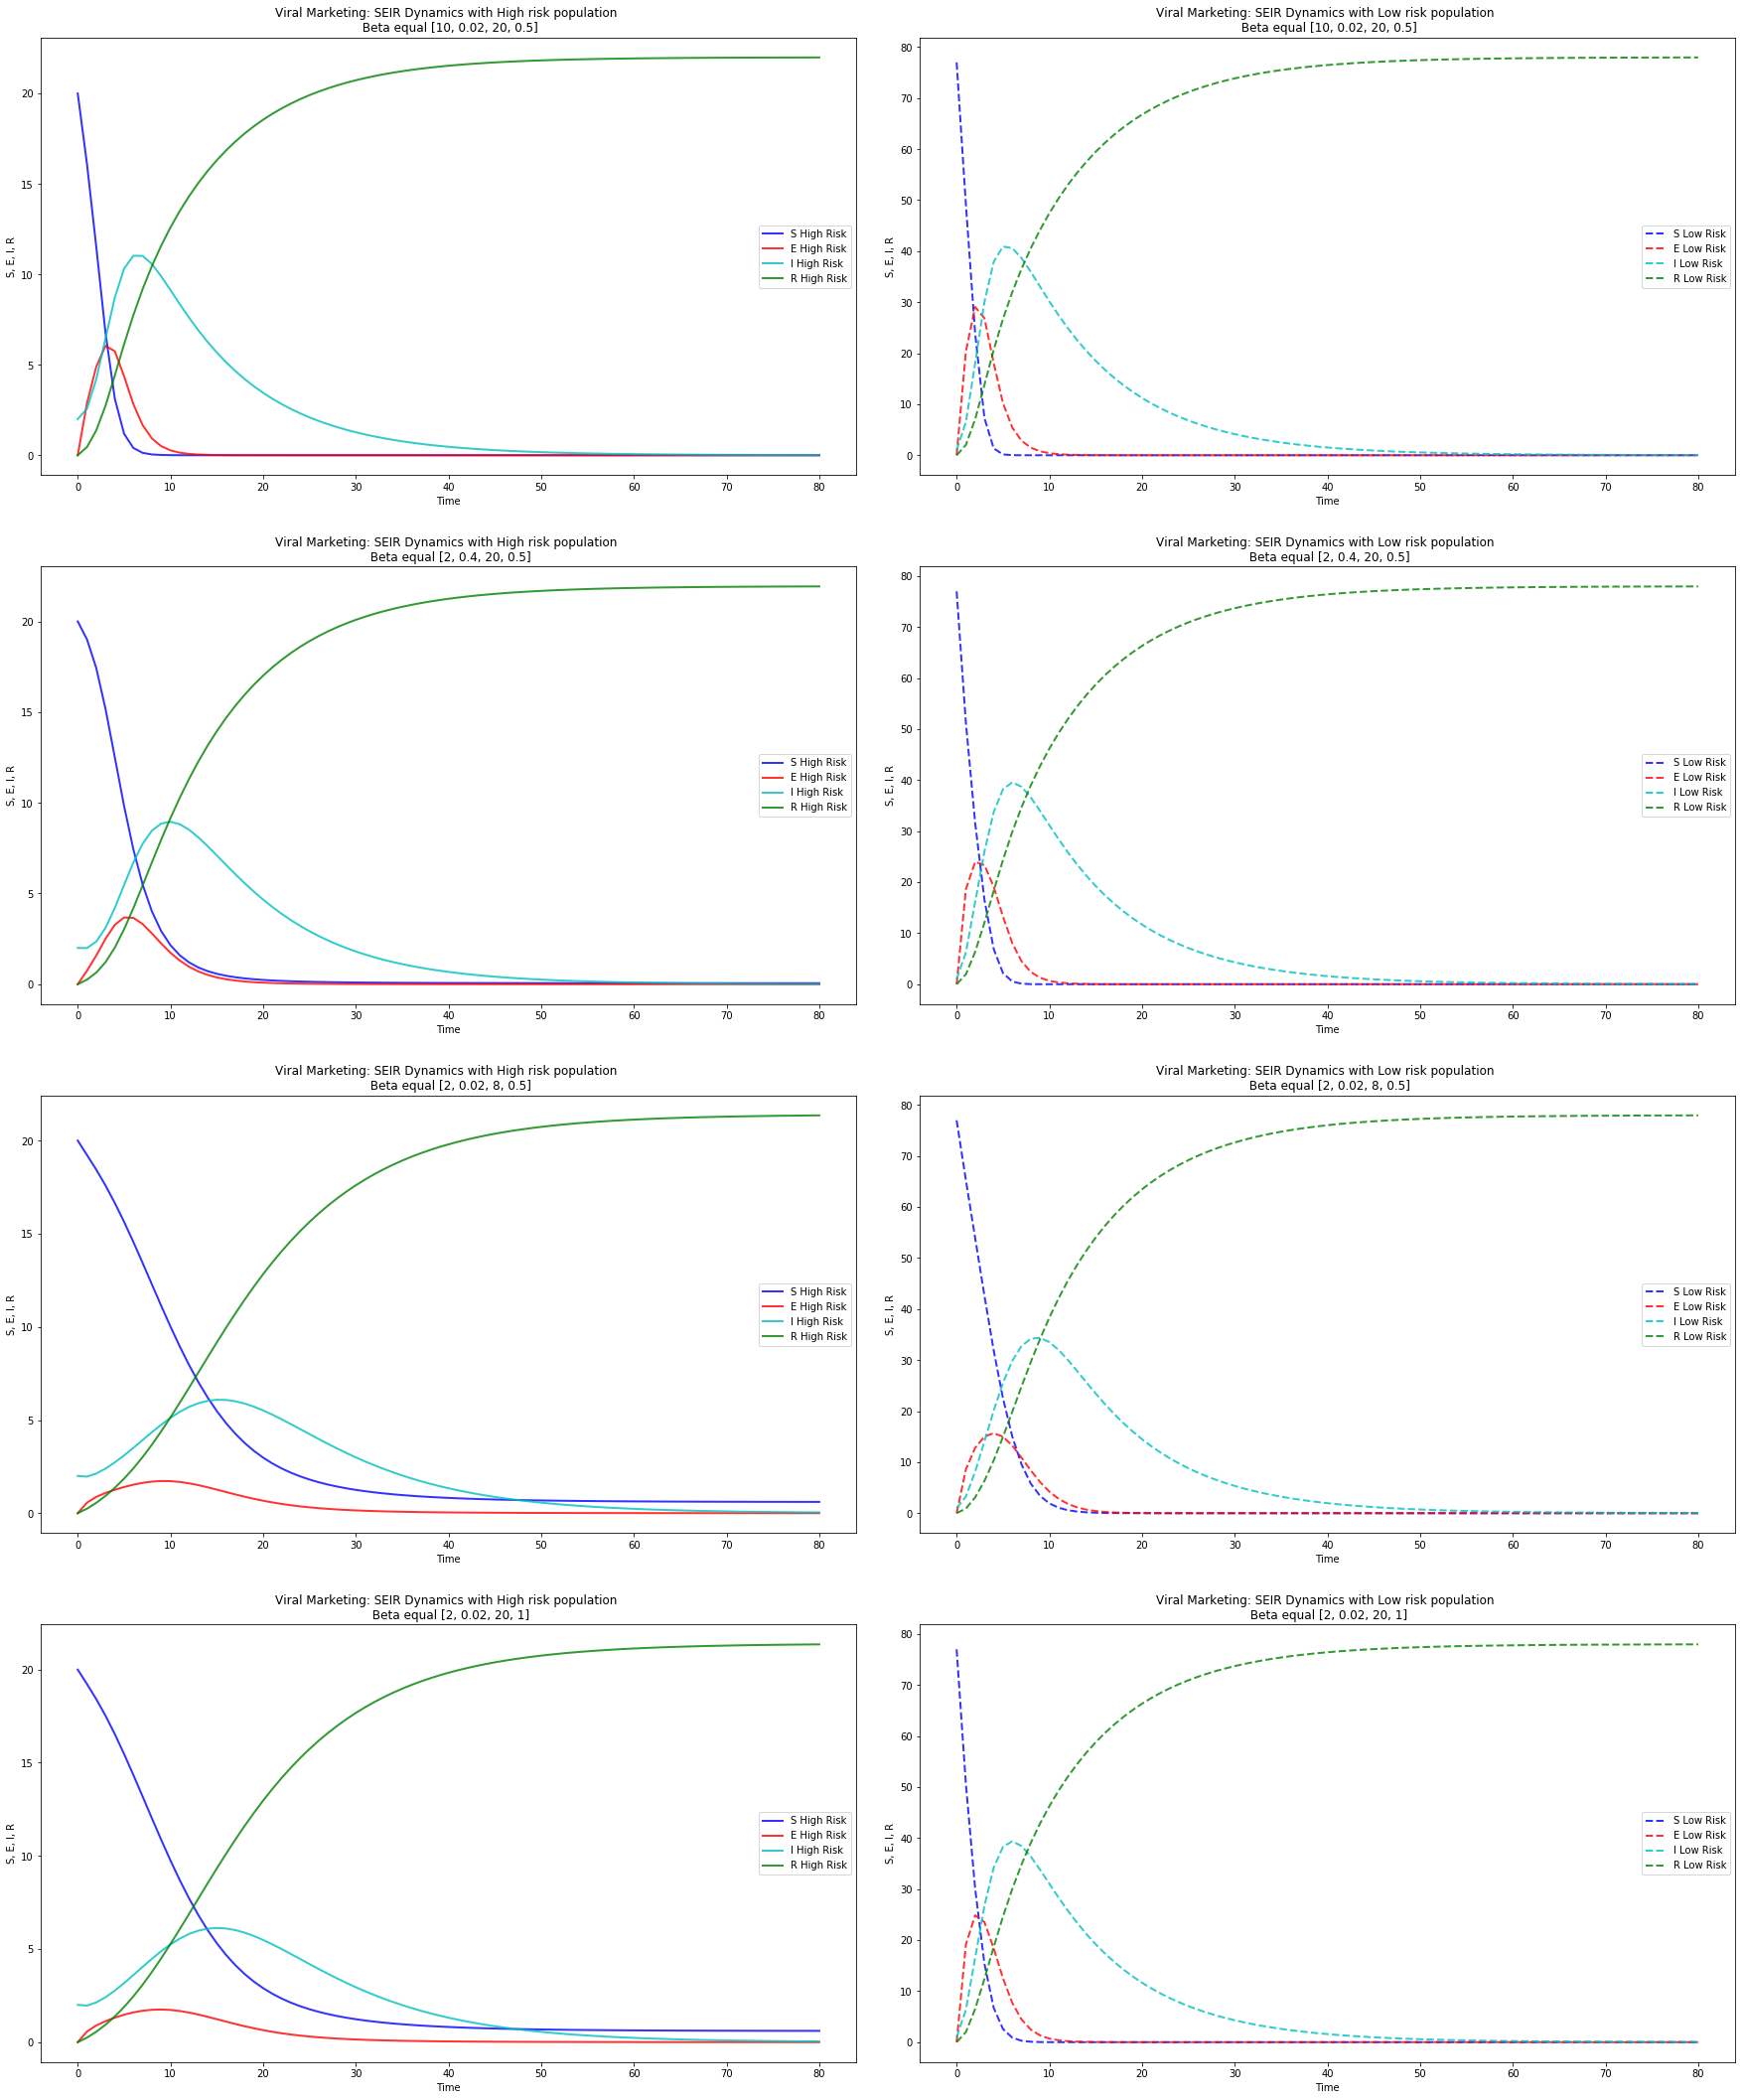

In [14]:
# PLOT
fig, axs = plt.subplots(nrows=4, ncols=2, facecolor='w', figsize=(25, 30))
for i in range(4):
    ax = axs.flatten()
    ax = axs[i, 0]
    ax.set_title((f'Viral Marketing: SEIR Dynamics with High risk population \n Beta equal {BETA[i]}'), loc = 'center')
    ax.plot(Viral_rsB.t, SHbeta[i], 'b', alpha=0.8, lw=2, label='S High Risk')
    ax.plot(Viral_rsB.t, EHbeta[i], 'r', alpha=0.8, lw=2, label='E High Risk')
    ax.plot(Viral_rsB.t, IHbeta[i], 'c', alpha=0.8, lw=2, label='I High Risk')
    ax.plot(Viral_rsB.t, RHbeta[i], 'g', alpha=0.8, lw=2, label='R High Risk')
    ax.set_xlabel('Time')
    ax.set_ylabel('S, E, I, R')
    legend = ax.legend()
    ax = axs[i,1]
    ax.set_title((f'Viral Marketing: SEIR Dynamics with Low risk population \n Beta equal {BETA[i]}'))
    ax.plot(Viral_rsB.t, SLbeta[i], 'b', alpha=0.8, linestyle='dashed', lw=2, label='S Low Risk')
    ax.plot(Viral_rsB.t, ELbeta[i], 'r', alpha=0.8, linestyle='dashed', lw=2, label='E Low Risk')
    ax.plot(Viral_rsB.t, ILbeta[i], 'c', alpha=0.8, linestyle='dashed', lw=2, label='I Low Risk')
    ax.plot(Viral_rsB.t, RLbeta[i], 'g', alpha=0.8, linestyle='dashed', lw=2, label='R Low Risk')

    ax.set_xlabel('Time')
    ax.set_ylabel('S, E, I, R')
    legend = ax.legend()

fig.tight_layout(pad=3)
fig.savefig('PLOT2')

### ***Second simulation: parameter effect, changes in the inital population***
We analazie the changes in the inital population distribution, holding the other parameters fixed.

In [15]:
# Define time variables: 
nt = 80
steps_per_t = 1

#Initialize Parameters
alpha = 0.5
BETA = [2, 0.02, 20, 0.5]   #[B_HH, B_HL, BLH, B_LL]
gamma = 0.1
h = 0.15

#Initialize Population
N0 = 100
EH0 = 0
EL0 = 0
IH0 = [1, 2, 5, 7]
IL0 = 1
RH0 = 0
RL0 = 0
SL0 = 67
SHpop = []
EHpop = []
IHpop = []
RHpop = []
SLpop = []
ELpop = []
ILpop = []
RLpop = []

#Run the Model
for s in IH0:
    SH0 = N0 - s - SL0 - IL0
    
    #Initialize population vector
    INPUT = SH0, SL0, EH0, EL0, s, IL0, RH0, RL0 
    
    Viral_rsP = Viral_rs_model(INPUT, BETA, alpha, gamma, h, nt, steps_per_t)
    SH, SL, EH, EL, IH, IL, RH, RL = Viral_rsP.run()
    
    SHpop.append(SH)
    SLpop.append(SL)
    EHpop.append(EH)
    ELpop.append(EL)
    IHpop.append(IH)
    ILpop.append(IL)
    RHpop.append(RH)
    RLpop.append(RL)


Population in 80 days:
Target Market (naive) High Risk: 0.202
Exposed High Risk: 0.0
Actively Passing High Risk: 0.04
Done Passing High Risk: 31.758
Target Market (naive) Low Risk: -0.0
Exposed Low Risk: -0.0
Actively Passing Low Risk: 0.028
Done Passing Low Risk: 67.972

Population in 80 days:
Target Market (naive) High Risk: 0.186
Exposed High Risk: 0.0
Actively Passing High Risk: 0.031
Done Passing High Risk: 31.783
Target Market (naive) Low Risk: -0.0
Exposed Low Risk: 0.0
Actively Passing Low Risk: 0.025
Done Passing Low Risk: 67.975

Population in 80 days:
Target Market (naive) High Risk: 0.144
Exposed High Risk: 0.0
Actively Passing High Risk: 0.021
Done Passing High Risk: 31.834
Target Market (naive) Low Risk: 0.0
Exposed Low Risk: 0.0
Actively Passing Low Risk: 0.023
Done Passing Low Risk: 67.977

Population in 80 days:
Target Market (naive) High Risk: 0.121
Exposed High Risk: 0.0
Actively Passing High Risk: 0.019
Done Passing High Risk: 31.86
Target Market (naive) Low Risk: 

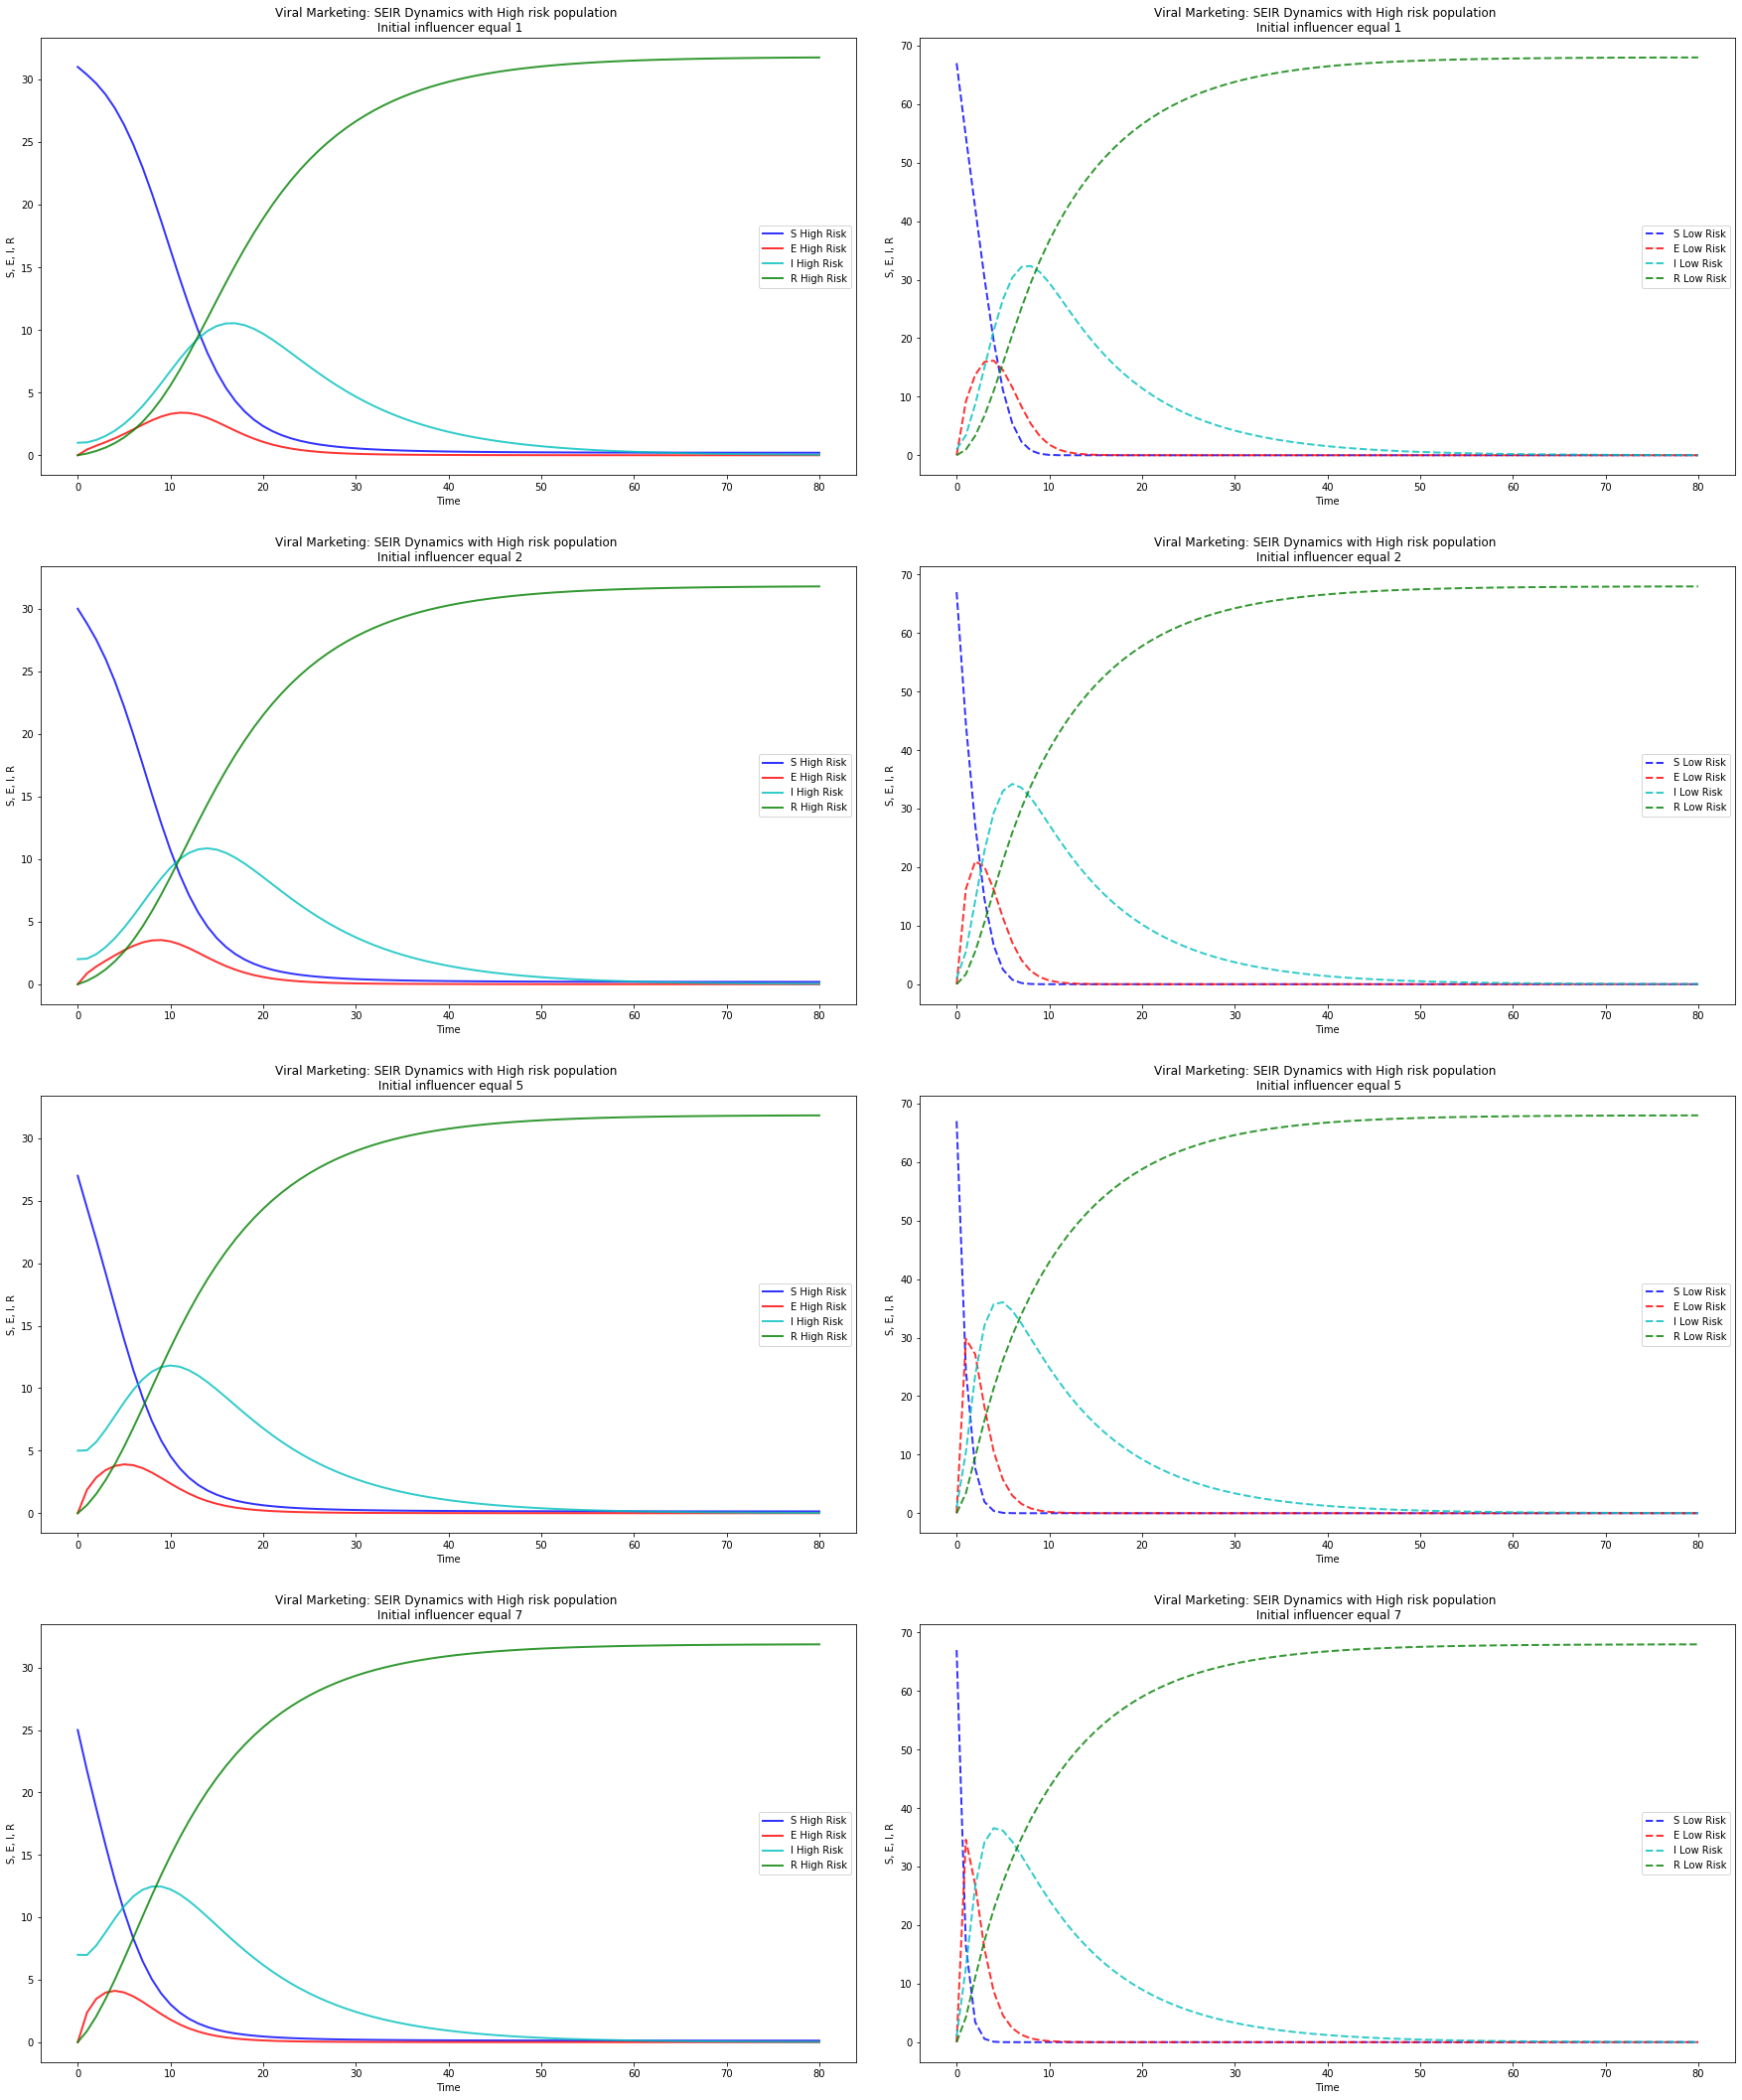

In [16]:
# PLOT
fig, axs = plt.subplots(nrows = 4, ncols = 2, facecolor = 'w', figsize = (25, 30))
for i in range(4):
    ax = axs.flatten()
    ax = axs[i,0]
    ax.set_title(f'Viral Marketing: SEIR Dynamics with High risk population \n Initial influencer equal {IH0[i]}')
    ax.plot(Viral_rsP.t, SHpop[i], 'b', alpha = 0.8, lw = 2, label = 'S High Risk')
    ax.plot(Viral_rsP.t, EHpop[i], 'r', alpha = 0.8, lw = 2, label = 'E High Risk')
    ax.plot(Viral_rsP.t, IHpop[i], 'c', alpha = 0.8, lw = 2, label = 'I High Risk')
    ax.plot(Viral_rsP.t, RHpop[i], 'g', alpha = 0.8, lw = 2, label = 'R High Risk')
    ax.set_xlabel('Time')
    ax.set_ylabel('S, E, I, R')
    legend = ax.legend(loc = ('center right'))
    
    ax = axs[i,1]
    ax.set_title(f'Viral Marketing: SEIR Dynamics with High risk population \n Initial influencer equal {IH0[i]}')
    ax.plot(Viral_rsP.t, SLpop[i], 'b', alpha = 0.8, linestyle = 'dashed', lw = 2, label = 'S Low Risk')
    ax.plot(Viral_rsP.t, ELpop[i], 'r', alpha = 0.8, linestyle = 'dashed', lw = 2, label = 'E Low Risk')
    ax.plot(Viral_rsP.t, ILpop[i], 'c', alpha = 0.8, linestyle = 'dashed', lw = 2, label = 'I Low Risk')
    ax.plot(Viral_rsP.t, RLpop[i], 'g', alpha = 0.8, linestyle = 'dashed', lw = 2, label = 'R Low Risk')
    ax.set_xlabel('Time')
    ax.set_ylabel('S, E, I, R')
    legend = ax.legend(loc = 'center right')
    
fig.tight_layout(pad = 3)